## Importing libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import requests

## --------------------------------------------------------------------------------------------------------------------------------

# Gathering:

In [2]:
tweet_json=[]
with open('tweet-json.txt') as file:
    for line in file:
        tweet_json.append(json.loads(line))

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
image=requests.get(url)    
with open ('image-predictions.tsv',mode='wb')as file:
    file.write(image.content)

In [4]:
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')
twitter_archive=pd.read_csv('twitter-archive-enhanced-2.csv')

In [5]:
tweet_json[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

### Create a new dataframe with coulmns which i will use.

In [6]:
twitter_data=pd.DataFrame(tweet_json,columns=['id','retweet_count','favorite_count'])
twitter_data=twitter_data.rename(columns={'id':'tweet_id'})
twitter_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [7]:
twitter_data.to_csv('twitter_data.csv',index=False)

In [8]:
twitter_data=pd.read_csv('twitter_data.csv')
twitter_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## --------------------------------------------------------------------------------------------------------------------------------

# Assessing:

#### Using describe(): to know the summation of each column ,if there missing value or not , And some statistics operations like(mean,max,min,….)

In [9]:
twitter_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Using info(): to know columns names ,datatypes and the non null count.

In [10]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### using duplicated():to know if there any duplicated value.

In [11]:
sum(twitter_data.tweet_id.duplicated())

0

In [12]:
#to show the dataframe:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### we want to know the better conf ALG from the three ALG ... it's (p1_conf).

In [13]:
sum(image_predictions.p1_conf>image_predictions.p2_conf)

2075

In [14]:
sum(image_predictions.p1_conf>image_predictions.p3_conf)

2075

In [15]:
sum(image_predictions.p2_conf>image_predictions.p3_conf)

2075

In [16]:
image_predictions.loc[(image_predictions.p1_dog==False)&(image_predictions.p2_dog==False)&(image_predictions.p3_dog==False)]
#so there are some noisy photos 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [17]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
sum(image_predictions.tweet_id.duplicated())

0

In [20]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [21]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
sum(twitter_archive.tweet_id.duplicated())

0

In [24]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Berb          1
Sunshine      1
General       1
Lenox         1
Edmund        1
Name: name, Length: 957, dtype: int64

In [25]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [26]:
sum(twitter_archive.rating_numerator<10)

440

In [27]:
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [28]:
sum(twitter_archive.rating_denominator<10)

3

## --------------------------------------------------------------------------------------------------------------------------------

# cleaning:

In [29]:
#First make a copy of all dataframes
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean=image_predictions.copy()
twitter_data_clean=twitter_data.copy()

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# Tidiness:
#### (1)collect all dogs stage in one column


In [31]:
twitter_archive_clean=pd.melt(twitter_archive_clean,id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text',
                                                 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls',
                                                 'rating_numerator','rating_denominator','name'],var_name='dog_stage',value_name='dogs_stage')
twitter_archive_clean = twitter_archive_clean.drop('dog_stage', 1)
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', keep='last')

### Test


In [32]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None
2262,667546741521195010,NaN,NaN,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667546741...,9,10,George,None
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,puppo
7465,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,puppo
7466,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,puppo
7622,803773340896923648,NaN,NaN,2016-11-30 01:31:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803773340...,12,10,Diogi,puppo


In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dogs_stage                  23

In [34]:
twitter_archive_clean['dogs_stage'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dogs_stage, dtype: int64

In [35]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### (2)collect all data in one dataset

In [37]:
twitter_archive_clean=pd.merge(twitter_archive_clean,image_predictions_clean,on='tweet_id',how='left')
twitter_archive_clean=pd.merge(twitter_archive_clean,twitter_data_clean,on='tweet_id',how='left')


### Test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dogs_stage                  2356 

In [39]:
twitter_archive_clean


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,...,0.999335,False,vizsla,0.000081,True,collie,0.000069,True,37.0,0.0
1,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,...,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False,34.0,0.0
2,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,...,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False,2454.0,6138.0
3,667546741521195010,NaN,NaN,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667546741...,...,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False,138.0,355.0
4,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,...,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True,568.0,917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,...,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True,19669.0,56413.0
2352,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1483.0,0.0
2353,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,...,0.524454,True,Siberian_husky,0.467678,True,malamute,0.004976,True,1483.0,7020.0
2354,803773340896923648,NaN,NaN,2016-11-30 01:31:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803773340...,...,0.817066,True,redbone,0.059707,True,Irish_terrier,0.034195,True,3220.0,11203.0


In [40]:
twitter_archive_clean[twitter_archive_clean['tweet_id']==688211956440801280]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
444,688211956440801280,NaN,NaN,2016-01-16 04:11:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derby. He's a superstar. 13/10 (vid by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688211956...,...,0.369449,False,four-poster,0.105307,False,shoji,0.098767,False,937.0,2426.0


# Quality:
#### (1)invaild timestamp datatype (str)instead of(datetime) & remove mark(+)
#### (2)invaild tweet_id datatype (int)instead of(str)
#### (3)invalid p1_dog,p2_dog,p3_dog (str)instead of(bool)
#### (4)invalid rating_numerator,rating_denominator (int)instead of(float)
#### (5)drop unimportant cols and have many missing values
#### (6)remove rows with missing images
#### (7)correct rating_denominator must be all values =10
#### (8)correct rating_numerator must be all values <10
#### (9)some names upper and some lower ..make them all upper
#### (10)collect all dogs_type in one column
#### (11)collect the best confs in one column
#### (12)remove the noisy data from names
#### (13)remove the noisy data from dgos_stage

#### (1)invaild timestamp datatype (str)instead of(datetime) & remove mark(+)

In [41]:
twitter_archive_clean['timestamp']

0       2015-11-20 03:51:52 +0000
1       2015-11-20 03:51:47 +0000
2       2015-11-20 03:44:31 +0000
3       2015-11-20 03:35:20 +0000
4       2015-11-20 03:25:43 +0000
                  ...            
2351    2017-01-29 02:44:34 +0000
2352    2017-01-27 23:16:13 +0000
2353    2017-01-27 17:04:02 +0000
2354    2016-11-30 01:31:12 +0000
2355    2017-05-03 03:17:27 +0000
Name: timestamp, Length: 2356, dtype: object

In [42]:
twitter_archive_clean['time']=twitter_archive_clean.timestamp.str.split('+',1)

In [43]:
twitter_archive_clean['time']

0       [2015-11-20 03:51:52 , 0000]
1       [2015-11-20 03:51:47 , 0000]
2       [2015-11-20 03:44:31 , 0000]
3       [2015-11-20 03:35:20 , 0000]
4       [2015-11-20 03:25:43 , 0000]
                    ...             
2351    [2017-01-29 02:44:34 , 0000]
2352    [2017-01-27 23:16:13 , 0000]
2353    [2017-01-27 17:04:02 , 0000]
2354    [2016-11-30 01:31:12 , 0000]
2355    [2017-05-03 03:17:27 , 0000]
Name: time, Length: 2356, dtype: object

In [44]:
for i in range(2355):
    twitter_archive_clean['time&date']=twitter_archive_clean['time'][i][0]

In [45]:
twitter_archive_clean['time&date']

0       2016-11-30 01:31:12 
1       2016-11-30 01:31:12 
2       2016-11-30 01:31:12 
3       2016-11-30 01:31:12 
4       2016-11-30 01:31:12 
                ...         
2351    2016-11-30 01:31:12 
2352    2016-11-30 01:31:12 
2353    2016-11-30 01:31:12 
2354    2016-11-30 01:31:12 
2355    2016-11-30 01:31:12 
Name: time&date, Length: 2356, dtype: object

### Test

In [46]:
twitter_archive_clean['time&date'] = pd.to_datetime(twitter_archive_clean['time&date'])
twitter_archive_clean['time&date']

0      2016-11-30 01:31:12
1      2016-11-30 01:31:12
2      2016-11-30 01:31:12
3      2016-11-30 01:31:12
4      2016-11-30 01:31:12
               ...        
2351   2016-11-30 01:31:12
2352   2016-11-30 01:31:12
2353   2016-11-30 01:31:12
2354   2016-11-30 01:31:12
2355   2016-11-30 01:31:12
Name: time&date, Length: 2356, dtype: datetime64[ns]

In [47]:
twitter_archive_clean=twitter_archive_clean.drop('timestamp',axis=1)
twitter_archive_clean=twitter_archive_clean.drop('time',axis=1)


In [48]:
twitter_archive_clean.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,time&date
0,667550904950915073,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,...,False,vizsla,0.000081,True,collie,0.000069,True,37.0,0.0,2016-11-30 01:31:12
1,667550882905632768,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,...,False,dishwasher,0.000201,False,oscilloscope,0.000142,False,34.0,0.0,2016-11-30 01:31:12
2,667549055577362432,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,...,False,spotlight,0.007737,False,lampshade,0.001901,False,2454.0,6138.0,2016-11-30 01:31:12
3,667546741521195010,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667546741...,9,...,True,miniature_poodle,0.202225,True,teddy,0.004047,False,138.0,355.0,2016-11-30 01:31:12
4,667544320556335104,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,...,True,Pembroke,0.312958,True,Chihuahua,0.071960,True,568.0,917.0,2016-11-30 01:31:12


In [49]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   source                      2356 non-null   object        
 4   text                        2356 non-null   object        
 5   retweeted_status_id         181 non-null    float64       
 6   retweeted_status_user_id    181 non-null    float64       
 7   retweeted_status_timestamp  181 non-null    object        
 8   expanded_urls               2297 non-null   object        
 9   rating_numerator            2356 non-null   int64         
 10  rating_denominator          2356 non-null   int64         
 11  name                        2356 non-null   object      

#### (2)invaild tweet_id datatype (int)instead of(str)
#### (3)invalid p1_dog,p2_dog,p3_dog (str)instead of(bool)
#### (4)invalid rating_numerator,rating_denominator (int)instead of(float)

In [50]:
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean.rating_denominator=twitter_archive_clean.rating_denominator.astype(float)
twitter_archive_clean.p1_dog=twitter_archive_clean.p1_dog.astype(bool)
twitter_archive_clean.p2_dog=twitter_archive_clean.p2_dog.astype(bool)
twitter_archive_clean.p3_dog=twitter_archive_clean.p3_dog.astype(bool)



### Test

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   source                      2356 non-null   object        
 4   text                        2356 non-null   object        
 5   retweeted_status_id         181 non-null    float64       
 6   retweeted_status_user_id    181 non-null    float64       
 7   retweeted_status_timestamp  181 non-null    object        
 8   expanded_urls               2297 non-null   object        
 9   rating_numerator            2356 non-null   float64       
 10  rating_denominator          2356 non-null   float64       
 11  name                        2356 non-null   object      

#### (5)drop unimportant cols and have many missing values

In [52]:
twitter_archive_clean=twitter_archive_clean.drop('in_reply_to_status_id',axis=1)
twitter_archive_clean=twitter_archive_clean.drop('in_reply_to_user_id',axis=1)
twitter_archive_clean=twitter_archive_clean.drop('retweeted_status_id',axis=1)
twitter_archive_clean=twitter_archive_clean.drop('retweeted_status_user_id',axis=1)
twitter_archive_clean=twitter_archive_clean.drop('retweeted_status_timestamp',axis=1)


### Test

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   source              2356 non-null   object        
 2   text                2356 non-null   object        
 3   expanded_urls       2297 non-null   object        
 4   rating_numerator    2356 non-null   float64       
 5   rating_denominator  2356 non-null   float64       
 6   name                2356 non-null   object        
 7   dogs_stage          2356 non-null   object        
 8   jpg_url             2075 non-null   object        
 9   img_num             2075 non-null   float64       
 10  p1                  2075 non-null   object        
 11  p1_conf             2075 non-null   float64       
 12  p1_dog              2356 non-null   bool          
 13  p2                  2075 non-null   object      

In [54]:
sum(twitter_archive_clean.jpg_url.isnull())

281

#### (6)remove rows with missing images

In [55]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()]
twitter_archive_clean.jpg_url.value_counts()

https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg    2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg    2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg    2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg    2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg    2
                                                  ..
https://pbs.twimg.com/media/CmfssOtXYAAKa_Z.jpg    1
https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg    1
https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg    1
https://pbs.twimg.com/media/CmkO57iXgAEOxX9.jpg    1
https://pbs.twimg.com/media/CcovaMUXIAApFDl.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

### Test

In [56]:
sum(twitter_archive_clean.jpg_url.isnull())

0

In [57]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2075 non-null   object        
 1   source              2075 non-null   object        
 2   text                2075 non-null   object        
 3   expanded_urls       2075 non-null   object        
 4   rating_numerator    2075 non-null   float64       
 5   rating_denominator  2075 non-null   float64       
 6   name                2075 non-null   object        
 7   dogs_stage          2075 non-null   object        
 8   jpg_url             2075 non-null   object        
 9   img_num             2075 non-null   float64       
 10  p1                  2075 non-null   object        
 11  p1_conf             2075 non-null   float64       
 12  p1_dog              2075 non-null   bool          
 13  p2                  2075 non-null   object      

In [58]:
twitter_archive_clean.rating_denominator.value_counts()

10.0     2057
50.0        3
80.0        2
11.0        2
150.0       1
70.0        1
90.0        1
170.0       1
110.0       1
130.0       1
7.0         1
120.0       1
20.0        1
40.0        1
2.0         1
Name: rating_denominator, dtype: int64

#### (7)correct rating_denominator must be all values =10

In [59]:
k=list(twitter_archive_clean.rating_denominator)
for i in range (2075):
    twitter_archive_clean.rating_denominator=twitter_archive_clean.rating_denominator.replace(k[i],10)

### Test

In [60]:
twitter_archive_clean.rating_denominator.value_counts()

10.0    2075
Name: rating_denominator, dtype: int64

In [61]:
twitter_archive_clean.rating_denominator.describe()

count    2075.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [62]:
twitter_archive_clean.rating_numerator.value_counts()

12.0      474
10.0      429
11.0      413
13.0      284
9.0       151
8.0        95
7.0        52
14.0       40
5.0        34
6.0        32
3.0        19
4.0        16
2.0         9
1.0         5
0.0         2
50.0        1
44.0        1
60.0        1
143.0       1
75.0        1
26.0        1
144.0       1
88.0        1
24.0        1
84.0        1
15.0        1
27.0        1
121.0       1
1776.0      1
204.0       1
420.0       1
45.0        1
165.0       1
99.0        1
80.0        1
Name: rating_numerator, dtype: int64

In [63]:
twitter_archive_clean.rating_numerator.describe()

count    2075.000000
mean       12.266024
std        40.680299
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [64]:
sum(twitter_archive_clean.rating_numerator>=10)

1660

### (8)correct rating_numerator must be all values <10

In [65]:
l=list(twitter_archive_clean.rating_numerator)
for i in range(2075):
    if(l[i]<10):
        twitter_archive_clean.rating_numerator=twitter_archive_clean.rating_numerator.replace(l[i],l[i]+10)
        

### Test

In [66]:
twitter_archive_clean.rating_numerator.value_counts()

12.0      483
10.0      431
11.0      418
13.0      303
19.0      151
18.0       95
14.0       56
17.0       52
15.0       35
16.0       32
80.0        1
44.0        1
60.0        1
50.0        1
143.0       1
75.0        1
144.0       1
88.0        1
24.0        1
84.0        1
27.0        1
121.0       1
1776.0      1
204.0       1
420.0       1
45.0        1
165.0       1
99.0        1
26.0        1
Name: rating_numerator, dtype: int64

In [67]:
sum(twitter_archive_clean.rating_numerator<10)

0

In [68]:
twitter_archive_clean.rating_numerator.describe()

count    2075.000000
mean       14.266024
std        40.627949
min        10.000000
25%        11.000000
50%        12.000000
75%        13.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [69]:
#creating Rating coulmn= twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']
twitter_archive_clean['rating']=(twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator'])*10

In [70]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2075 non-null   object        
 1   source              2075 non-null   object        
 2   text                2075 non-null   object        
 3   expanded_urls       2075 non-null   object        
 4   rating_numerator    2075 non-null   float64       
 5   rating_denominator  2075 non-null   float64       
 6   name                2075 non-null   object        
 7   dogs_stage          2075 non-null   object        
 8   jpg_url             2075 non-null   object        
 9   img_num             2075 non-null   float64       
 10  p1                  2075 non-null   object        
 11  p1_conf             2075 non-null   float64       
 12  p1_dog              2075 non-null   bool          
 13  p2                  2075 non-null   object      

In [71]:
twitter_archive_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,time&date,rating
0,667550904950915073,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12.0,10.0,None,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1.0,...,vizsla,0.000081,True,collie,0.000069,True,37.0,0.0,2016-11-30 01:31:12,12.0
1,667550882905632768,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,15.0,10.0,None,None,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1.0,...,dishwasher,0.000201,False,oscilloscope,0.000142,False,34.0,0.0,2016-11-30 01:31:12,15.0
2,667549055577362432,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,11.0,10.0,None,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,...,spotlight,0.007737,False,lampshade,0.001901,False,2454.0,6138.0,2016-11-30 01:31:12,11.0
3,667546741521195010,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,19.0,10.0,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,...,miniature_poodle,0.202225,True,teddy,0.004047,False,138.0,355.0,2016-11-30 01:31:12,19.0
4,667544320556335104,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10.0,10.0,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,...,Pembroke,0.312958,True,Chihuahua,0.071960,True,568.0,917.0,2016-11-30 01:31:12,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,744995568523612160,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,19.0,10.0,Abby,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1.0,...,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,716.0,3277.0,2016-11-30 01:31:12,19.0
2351,825535076884762624,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14.0,10.0,None,puppo,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1.0,...,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True,19669.0,56413.0,2016-11-30 01:31:12,14.0
2353,825026590719483904,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12.0,10.0,Pablo,puppo,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2.0,...,Siberian_husky,0.467678,True,malamute,0.004976,True,1483.0,7020.0,2016-11-30 01:31:12,12.0
2354,803773340896923648,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,https://twitter.com/dog_rates/status/803773340...,12.0,10.0,Diogi,puppo,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2.0,...,redbone,0.059707,True,Irish_terrier,0.034195,True,3220.0,11203.0,2016-11-30 01:31:12,12.0


### (9)some names upper and some lower ..make them all upper


In [72]:
twitter_archive_clean.p1=twitter_archive_clean.p1.str.title()
twitter_archive_clean.p2=twitter_archive_clean.p2.str.title()
twitter_archive_clean.p3=twitter_archive_clean.p3.str.title()


### Test

In [73]:
twitter_archive_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,time&date,rating
0,667550904950915073,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12.0,10.0,None,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1.0,...,Vizsla,0.000081,True,Collie,0.000069,True,37.0,0.0,2016-11-30 01:31:12,12.0
1,667550882905632768,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,15.0,10.0,None,None,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1.0,...,Dishwasher,0.000201,False,Oscilloscope,0.000142,False,34.0,0.0,2016-11-30 01:31:12,15.0
2,667549055577362432,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,11.0,10.0,None,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,...,Spotlight,0.007737,False,Lampshade,0.001901,False,2454.0,6138.0,2016-11-30 01:31:12,11.0
3,667546741521195010,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,19.0,10.0,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,...,Miniature_Poodle,0.202225,True,Teddy,0.004047,False,138.0,355.0,2016-11-30 01:31:12,19.0
4,667544320556335104,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10.0,10.0,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,...,Pembroke,0.312958,True,Chihuahua,0.071960,True,568.0,917.0,2016-11-30 01:31:12,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,744995568523612160,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,19.0,10.0,Abby,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1.0,...,Shih-Tzu,0.146336,True,Tibetan_Terrier,0.134269,True,716.0,3277.0,2016-11-30 01:31:12,19.0
2351,825535076884762624,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14.0,10.0,None,puppo,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1.0,...,Tibetan_Mastiff,0.147940,True,Black-And-Tan_Coonhound,0.024525,True,19669.0,56413.0,2016-11-30 01:31:12,14.0
2353,825026590719483904,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12.0,10.0,Pablo,puppo,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2.0,...,Siberian_Husky,0.467678,True,Malamute,0.004976,True,1483.0,7020.0,2016-11-30 01:31:12,12.0
2354,803773340896923648,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,https://twitter.com/dog_rates/status/803773340...,12.0,10.0,Diogi,puppo,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2.0,...,Redbone,0.059707,True,Irish_Terrier,0.034195,True,3220.0,11203.0,2016-11-30 01:31:12,12.0


In [74]:
sum(twitter_archive_clean.source.duplicated())

2072

In [75]:
t_index=twitter_archive_clean.loc[(twitter_archive_clean.p1_dog==False)&(twitter_archive_clean.p2_dog==False)&(twitter_archive_clean.p3_dog==False)].index
twitter_archive_clean=twitter_archive_clean.drop(t_index)
twitter_archive_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,time&date,rating
0,667550904950915073,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12.0,10.0,None,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1.0,...,Vizsla,0.000081,True,Collie,0.000069,True,37.0,0.0,2016-11-30 01:31:12,12.0
3,667546741521195010,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,19.0,10.0,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,...,Miniature_Poodle,0.202225,True,Teddy,0.004047,False,138.0,355.0,2016-11-30 01:31:12,19.0
4,667544320556335104,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10.0,10.0,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,...,Pembroke,0.312958,True,Chihuahua,0.071960,True,568.0,917.0,2016-11-30 01:31:12,10.0
5,667538891197542400,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,19.0,10.0,a,None,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1.0,...,Silky_Terrier,0.300313,True,Australian_Terrier,0.053412,True,72.0,220.0,2016-11-30 01:31:12,19.0
7,667534815156183040,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,18.0,10.0,Frank,None,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,1.0,...,Cardigan,0.307407,True,Cocker_Spaniel,0.033158,True,576.0,866.0,2016-11-30 01:31:12,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,744995568523612160,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,19.0,10.0,Abby,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1.0,...,Shih-Tzu,0.146336,True,Tibetan_Terrier,0.134269,True,716.0,3277.0,2016-11-30 01:31:12,19.0
2351,825535076884762624,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14.0,10.0,None,puppo,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1.0,...,Tibetan_Mastiff,0.147940,True,Black-And-Tan_Coonhound,0.024525,True,19669.0,56413.0,2016-11-30 01:31:12,14.0
2353,825026590719483904,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12.0,10.0,Pablo,puppo,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2.0,...,Siberian_Husky,0.467678,True,Malamute,0.004976,True,1483.0,7020.0,2016-11-30 01:31:12,12.0
2354,803773340896923648,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,https://twitter.com/dog_rates/status/803773340...,12.0,10.0,Diogi,puppo,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2.0,...,Redbone,0.059707,True,Irish_Terrier,0.034195,True,3220.0,11203.0,2016-11-30 01:31:12,12.0


In [76]:
#### (10)collect all dogs_type in one column
#### (11)collect the best confs in one column

#create 2 new list to save the best values in them
dog_type=[]
conf=[]
#make lists of 3 p1 coulmns to be easier to use their values 
q=list(twitter_archive_clean.p1_dog)
w=list(twitter_archive_clean.p1)
z=list(twitter_archive_clean.p1_conf)
#make lists of 3 p2 coulmns to be easier to use their values 
e=list(twitter_archive_clean.p2_dog)
r=list(twitter_archive_clean.p2)
t=list(twitter_archive_clean.p2_conf)
#make lists of 3 p3 coulmns to be easier to use their values 
y=list(twitter_archive_clean.p3_dog)
u=list(twitter_archive_clean.p3)
p=list(twitter_archive_clean.p3_conf)
#as we know the p1 is the better algorithm the p2 then p3
#so when p1 is true ,then this is a type of dog and we will save its value in list dog_type and its conf in list conf
#if it false we will do to the second ALG p2 and if it true we will save its value in list dog_type its conf in list conf
#if it false we will do to the third ALG p2 and if it true we will save its value in list dog_type its conf in list conf
#if false we will loop again untill finishing the range(1751)
for i in range(1751):
    if(q[i]==True):
        dog_type.append(w[i])
        conf.append(z[i])
    elif(e[i]==True):
        dog_type.append(r[i])
        conf.append(t[i])
    elif(y[i]==True):
        dog_type.append(u[i])
        conf.append(p[i])
#in the end we will create columns dogs_type ,conf to save the values which in lists
twitter_archive_clean['dogs_type']=dog_type  
twitter_archive_clean['conf']=conf
twitter_archive_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,time&date,rating,dogs_type,conf
0,667550904950915073,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12.0,10.0,None,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1.0,...,True,Collie,0.000069,True,37.0,0.0,2016-11-30 01:31:12,12.0,Vizsla,0.000081
3,667546741521195010,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,19.0,10.0,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,...,True,Teddy,0.004047,False,138.0,355.0,2016-11-30 01:31:12,19.0,Toy_Poodle,0.787424
4,667544320556335104,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10.0,10.0,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,...,True,Chihuahua,0.071960,True,568.0,917.0,2016-11-30 01:31:12,10.0,Pomeranian,0.412893
5,667538891197542400,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,19.0,10.0,a,None,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1.0,...,True,Australian_Terrier,0.053412,True,72.0,220.0,2016-11-30 01:31:12,19.0,Yorkshire_Terrier,0.618957
7,667534815156183040,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,18.0,10.0,Frank,None,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,1.0,...,True,Cocker_Spaniel,0.033158,True,576.0,866.0,2016-11-30 01:31:12,18.0,Pembroke,0.435254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,744995568523612160,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,19.0,10.0,Abby,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1.0,...,True,Tibetan_Terrier,0.134269,True,716.0,3277.0,2016-11-30 01:31:12,19.0,Old_English_Sheepdog,0.427481
2351,825535076884762624,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14.0,10.0,None,puppo,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1.0,...,True,Black-And-Tan_Coonhound,0.024525,True,19669.0,56413.0,2016-11-30 01:31:12,14.0,Rottweiler,0.681495
2353,825026590719483904,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12.0,10.0,Pablo,puppo,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2.0,...,True,Malamute,0.004976,True,1483.0,7020.0,2016-11-30 01:31:12,12.0,Eskimo_Dog,0.524454
2354,803773340896923648,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,https://twitter.com/dog_rates/status/803773340...,12.0,10.0,Diogi,puppo,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2.0,...,True,Irish_Terrier,0.034195,True,3220.0,11203.0,2016-11-30 01:31:12,12.0,Miniature_Pinscher,0.817066


### drop unimportant columns after creating dogs_type and conf

In [77]:
twitter_archive_clean=twitter_archive_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],1)

### Test

In [78]:
twitter_archive_clean.name.value_counts()

None            439
a                46
Tucker           10
Cooper           10
Lucy             10
               ... 
Brandy            1
Tiger             1
Gunner            1
Alexanderson      1
Hermione          1
Name: name, Length: 852, dtype: int64

### (12)remove the noisy data from names

In [79]:
name_index=twitter_archive_clean.loc[(twitter_archive_clean.name=='None')].index
twitter_archive_clean=twitter_archive_clean.drop(name_index)

### Test

In [80]:
twitter_archive_clean.name.value_counts()

a               46
Cooper          10
Lucy            10
Tucker          10
Charlie         10
                ..
Brandy           1
Tiger            1
Gunner           1
Alexanderson     1
Hermione         1
Name: name, Length: 851, dtype: int64

### (13)remove the noisy data from dgos_stage

In [81]:
dogs_index=twitter_archive_clean.loc[(twitter_archive_clean.dogs_stage=='None')].index
twitter_archive_clean=twitter_archive_clean.drop(dogs_index)

### Test

In [82]:
twitter_archive_clean.dogs_stage.value_counts()

pupper     109
doggo       36
puppo       16
floofer      5
Name: dogs_stage, dtype: int64

In [83]:
import numpy as np
index=np.arange(1,167)
twitter_archive_clean.index=index
twitter_archive_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,retweet_count,favorite_count,time&date,rating,dogs_type,conf
1,846514051647705089,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13.0,10.0,Barney,doggo,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2.0,13076.0,48410.0,2016-11-30 01:31:12,13.0,Golden_Retriever,0.650003
2,786363235746385920,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,https://twitter.com/dog_rates/status/786363235...,13.0,10.0,Rizzo,doggo,https://pbs.twimg.com/media/Cum5LlfWAAAyPcS.jpg,1.0,4072.0,12189.0,2016-11-30 01:31:12,13.0,Golden_Retriever,0.929266
3,832032802820481025,"<a href=""http://twitter.com/download/iphone"" r...",This is Miguel. He was the only remaining dogg...,"https://www.petfinder.com/petdetail/34918210,h...",12.0,10.0,Miguel,doggo,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1.0,4746.0,13887.0,2016-11-30 01:31:12,12.0,Whippet,0.601712
4,831939777352105988,"<a href=""http://twitter.com/download/iphone"" r...",This is Emanuel. He's a h*ckin rare doggo. Dwe...,https://twitter.com/dog_rates/status/831939777...,12.0,10.0,Emanuel,doggo,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1.0,7031.0,26404.0,2016-11-30 01:31:12,12.0,Pomeranian,0.153862
5,836753516572119041,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,https://twitter.com/dog_rates/status/836753516...,12.0,10.0,Meera,doggo,https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg,1.0,5237.0,21029.0,2016-11-30 01:31:12,12.0,Schipperke,0.011564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,816829038950027264,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Betty. She's assisting ...,https://twitter.com/dog_rates/status/790946055...,12.0,10.0,Betty,puppo,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1.0,5496.0,0.0,2016-11-30 01:31:12,12.0,Golden_Retriever,0.245773
163,867421006826221569,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12.0,10.0,Shikha,puppo,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1.0,2697.0,16755.0,2016-11-30 01:31:12,12.0,Eskimo_Dog,0.616457
164,744995568523612160,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,19.0,10.0,Abby,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1.0,716.0,3277.0,2016-11-30 01:31:12,19.0,Old_English_Sheepdog,0.427481
165,825026590719483904,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12.0,10.0,Pablo,puppo,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2.0,1483.0,7020.0,2016-11-30 01:31:12,12.0,Eskimo_Dog,0.524454


In [84]:
# Drop coulmns which I will not use in visualization 

In [85]:
twitter_archive_clean=twitter_archive_clean.drop(['source','text','expanded_urls','rating_numerator','rating_denominator',
                                                 'jpg_url','img_num','time&date'],1)

### test

In [86]:
twitter_archive_clean

,tweet_id,name,dogs_stage,retweet_count,favorite_count,rating,dogs_type,conf
1,846514051647705089,Barney,doggo,13076.0,48410.0,13.0,Golden_Retriever,0.650003
2,786363235746385920,Rizzo,doggo,4072.0,12189.0,13.0,Golden_Retriever,0.929266
3,832032802820481025,Miguel,doggo,4746.0,13887.0,12.0,Whippet,0.601712
4,831939777352105988,Emanuel,doggo,7031.0,26404.0,12.0,Pomeranian,0.153862
5,836753516572119041,Meera,doggo,5237.0,21029.0,12.0,Schipperke,0.011564
...,...,...,...,...,...,...,...,...
162,816829038950027264,Betty,puppo,5496.0,0.0,12.0,Golden_Retriever,0.245773
163,867421006826221569,Shikha,puppo,2697.0,16755.0,12.0,Eskimo_Dog,0.616457
164,744995568523612160,Abby,puppo,716.0,3277.0,19.0,Old_English_Sheepdog,0.427481
165,825026590719483904,Pablo,puppo,1483.0,7020.0,12.0,Eskimo_Dog,0.524454


### Turning Dataframe into file csv:

In [87]:
twitter_archive_clean.to_csv("twitter_archive_clean.csv")

## ---------------------------------------------------------------------------------------------------------------------------------

# visualization:

In [88]:
dogs_stage_visualization=twitter_archive_clean.dogs_stage.value_counts()
dogs_stage_visualization

pupper     109
doggo       36
puppo       16
floofer      5
Name: dogs_stage, dtype: int64

### (1) percentage of dogs stage with 2 diffrenent ways in visualizing:

(-1.1074088151441537,
 1.1003528049759264,
 -1.1182393450067951,
 1.1048587908238106)

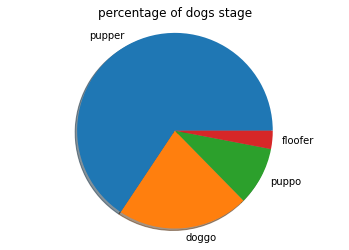

In [89]:
plt.pie(dogs_stage_visualization,
       labels=['pupper','doggo','puppo','floofer'],
       shadow=True)
plt.title('percentage of dogs stage')  
plt.axis('equal')

(array([ 36.,   0.,   0.,   5.,   0.,   0., 109.,   0.,   0.,  16.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

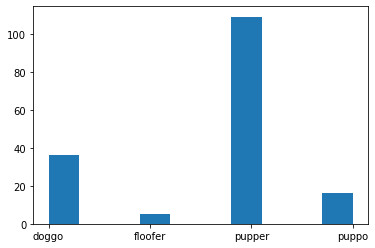

In [90]:
plt.hist(twitter_archive_clean.dogs_stage)

### (2)Relation between retweet_count and favorite_count

Text(0.5, 1.0, 'Relation between retweet_count and favorite_count ')

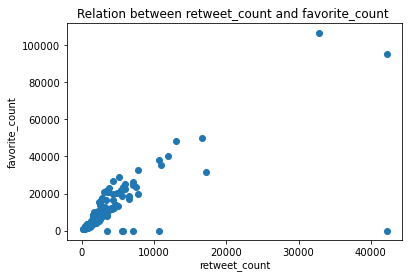

In [91]:
plt.scatter(twitter_archive_clean.retweet_count,twitter_archive_clean.favorite_count)
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.title('Relation between retweet_count and favorite_count ')

### (3)show the analysis of conf:

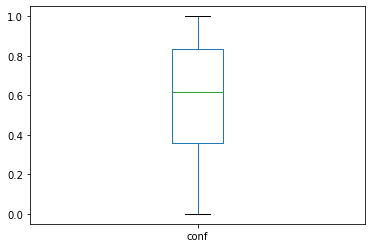

In [92]:
twitter_archive_clean.conf.plot(kind='box')

In [93]:
sum(twitter_archive_clean.dogs_type.sort_values().value_counts()>3)

12

In [94]:
most_dogs_type=twitter_archive_clean.dogs_type.sort_values().value_counts()>3
most_dogs_type=most_dogs_type.head(12)
most_dogs_type

Golden_Retriever             True
Pug                          True
Pomeranian                   True
Pembroke                     True
Labrador_Retriever           True
Chihuahua                    True
German_Shepherd              True
French_Bulldog               True
Toy_Poodle                   True
Eskimo_Dog                   True
Staffordshire_Bullterrier    True
Border_Collie                True
Name: dogs_type, dtype: bool

### (4) percentage of best dogs type (12 type):

(-1.1000000094094384,
 1.1000000175915503,
 -1.1000000130913898,
 1.1000000049092735)

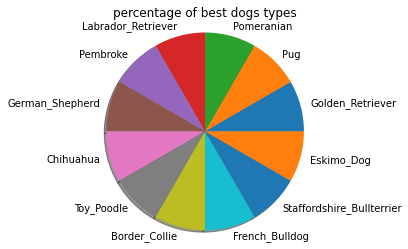

In [95]:
plt.pie(most_dogs_type,
       labels=['Golden_Retriever','Pug','Pomeranian','Labrador_Retriever','Pembroke','German_Shepherd',
            'Chihuahua', 'Toy_Poodle','Border_Collie', 'French_Bulldog','Staffordshire_Bullterrier','Eskimo_Dog'],
       shadow=True)
plt.title('percentage of best dogs types')  
plt.axis('equal')